>#### <i>Data Quality Assessment ~ Rushank Ghanshyam Sheta</i><hr>What I have explored here is a part of data validation, further univariate, bivariate, multivariate analysis and EDA can be performed after data cleaning is done.

In [72]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as snsx

%matplotlib inline
import matplotlib
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["figure.figsize"] = (7,5)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

In [73]:
def info(df, n=2, c=1):
    if c: print(list(df.columns))
    print('DF Shape: ',df.shape)
    return df.head(n)

In [74]:
CD = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic', skiprows=[0])
CA = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress', skiprows=[0])
T = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions', skiprows=[0])
# NCL = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList', skiprows=[0])

/var/folders/f4/x3f17tf94sq8z7mhzysfrsn80000gn/T/ipykernel_54883/724065175.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CD = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic', skiprows=[0])


## For Customer Demographic DataFrame<hr>

In [59]:
info(CD)

['customer_id', 'first_name', 'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'default', 'owns_car', 'tenure']
DF Shape:  (4000, 13)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0


In [60]:
CD.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [89]:
# check if columns have data of valid datatypes
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [39]:
# confirming if we have all the customer_id's unique
CD['customer_id'].nunique()

4000

In [7]:
CD.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [29]:
# checking unique values for each columns
for i in CD.columns:
    print('\t\t\tColumn: {}\n\t\t\tNo of Unique Values: {}\n{}\n-----'.format(i, CD[i].value_counts().shape[0],CD[i].value_counts()))

			Column: customer_id
			No of Unique Values: 4000
1       1
2672    1
2659    1
2660    1
2661    1
       ..
1339    1
1340    1
1341    1
1342    1
4000    1
Name: customer_id, Length: 4000, dtype: int64
-----
			Column: first_name
			No of Unique Values: 3139
Max         5
Tobe        5
Timmie      5
Kippy       4
Pail        4
           ..
Katy        1
Hakim       1
Fanchon     1
Jeanette    1
Sarene      1
Name: first_name, Length: 3139, dtype: int64
-----
			Column: last_name
			No of Unique Values: 3725
Pristnor     3
Ramsdell     3
Eager        2
Zisneros     2
Dredge       2
            ..
Whittock     1
Carwithen    1
Blas         1
Dearlove     1
Oldland      1
Name: last_name, Length: 3725, dtype: int64
-----
			Column: gender
			No of Unique Values: 6
Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64
-----
			Column: past_3_years_bike_related_purchases
			No of Unique Values: 100
16    56
19    56
67   

### Problems
#### <i>Customer Demographic</i>
<ol>
    <li><b><u>Null values:</b></u> in columns last_name, DOB, job_title, job_industry_category, default, tenure.
    <li><b><u>gender:</b></u> There are 6 different categories instead of just 3(Male, Female, Unknown).
     <li><b><u>default:</b></u> There are many random characters(looks like scripting language).
</ol>

## For Customer Address Data Frame<hr>

In [9]:
CA.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [10]:
info(CA)

['customer_id', 'address', 'postcode', 'state', 'country', 'property_valuation']
DF Shape:  (3999, 6)


,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10


In [90]:
# check if columns have data of valid datatypes
CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [11]:
CA.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [42]:
# confirming if we have all customer_id's unique
CA['customer_id'].nunique()

# it seems we had 4000 customer_ids in the "Customer Demographic" while we only have 3999 for "Customer Address"
# Lets check which id's are we missing

3999

In [24]:
# check if we have address information for all the customers(wrt customer_id)
CD["address_exists"] = CD['customer_id'].isin(CA["customer_id"])
CD["address_exists"].value_counts()

True     3996
False       4
Name: address_exists, dtype: int64

In [26]:
# We do not have address information for these customer_id's
CD[CD["address_exists"]==False]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,exists,address_exists
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,False,False
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0,False,False
21,22,Deeanne,Durtnell,Female,79,1962-12-10,NaN,IT,Mass Customer,N,ï¼ï¼ï¼,No,11.0,False,False
22,23,Olav,Polak,Male,43,1995-02-10,NaN,NaN,High Net Worth,N,2018-02-01 00:00:00,Yes,1.0,False,False


In [30]:
# checking unique values for each columns
for i in CA.columns:
    print('\t\t\tColumn: {}\n\t\t\tNo of Unique Values: {}\n{}\n-----'.format(i, CA[i].value_counts().shape[0],CA[i].value_counts()))

			Column: customer_id
			No of Unique Values: 3999
1       1
2676    1
2663    1
2664    1
2665    1
       ..
1343    1
1344    1
1345    1
1346    1
4003    1
Name: customer_id, Length: 3999, dtype: int64
-----
			Column: address
			No of Unique Values: 3996
3 Mariners Cove Terrace      2
3 Talisman Place             2
64 Macpherson Junction       2
359 Briar Crest Road         1
4543 Service Terrace         1
                            ..
5063 Shopko Pass             1
09 Hagan Pass                1
87897 Lighthouse Bay Pass    1
294 Lawn Junction            1
320 Acker Drive              1
Name: address, Length: 3996, dtype: int64
-----
			Column: postcode
			No of Unique Values: 873
2170    31
2155    30
2145    30
2153    29
3977    26
        ..
3808     1
3114     1
4721     1
4799     1
3089     1
Name: postcode, Length: 873, dtype: int64
-----
			Column: state
			No of Unique Values: 5
NSW                2054
VIC                 939
QLD                 838
New South Wales  

### Problems
#### <i>Customer Address</i>
<ol>
    <li><b><u>state:</b></u> Some names are abbrevation while some are full names.
    <li><b><u>missing address:</b></u> for customer with customer_id=[3,10,22,23]
</ol>

## For Transactions Data Frame<hr>

In [36]:
info(T)

['transaction_id', 'product_id', 'customer_id', 'transaction_date', 'online_order', 'order_status', 'brand', 'product_line', 'product_class', 'product_size', 'list_price', 'standard_cost', 'product_first_sold_date']
DF Shape:  (20000, 13)


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0


In [91]:
# check if columns have data of valid datatypes
T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [93]:
# lets check out some statistics for transactions out of curiosity
T.describe(include='all')

/var/folders/f4/x3f17tf94sq8z7mhzysfrsn80000gn/T/ipykernel_54883/3050661118.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  T.describe(include='all')


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,364,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,2017-02-14 00:00:00,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,82,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,NaN,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,NaN,0.500013,NaN,NaN,NaN,NaN,NaN,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000


In [38]:
# confirming if we have all transaction id's unique
T['transaction_id'].nunique()

20000

In [44]:
T['customer_id'].nunique()
# it seems like we have 3494 customers whose transaction details we have from the total 4000 customer id's

3494

In [48]:
T.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [51]:
# checking unique values for each columns
for i in T.columns:
    print('\t\t\tColumn: {}\n\t\t\tNo of Unique Values: {}\n{}\n-----'.format(i, T[i].value_counts().shape[0],T[i].value_counts()))

			Column: transaction_id
			No of Unique Values: 20000
1        1
13331    1
13338    1
13337    1
13336    1
        ..
6667     1
6666     1
6665     1
6664     1
20000    1
Name: transaction_id, Length: 20000, dtype: int64
-----
			Column: product_id
			No of Unique Values: 101
0      1378
3       354
1       311
35      268
38      267
       ... 
71      137
8       136
16      136
100     130
47      121
Name: product_id, Length: 101, dtype: int64
-----
			Column: customer_id
			No of Unique Values: 3494
2183    14
2476    14
1068    14
1672    13
2912    13
        ..
898      1
2352     1
1846     1
3279     1
1757     1
Name: customer_id, Length: 3494, dtype: int64
-----
			Column: transaction_date
			No of Unique Values: 364
2017-02-14    82
2017-08-18    82
2017-10-15    76
2017-01-31    73
2017-12-19    71
              ..
2017-01-12    38
2017-12-07    37
2017-03-29    36
2017-09-25    35
2017-10-19    32
Name: transaction_date, Length: 364, dtype: int64
-----
			Column: 

### Problems
#### <i>Transactions</i>
<ol>
    <li><b><u>Null values:</b></u> in columns online_order, brand, product_line, product_class, product_size, standard_cost, product_first_sold_date
    <li><b><u>state:</b></u> Some names are abbrevation while some are full names.
    <li><b><u>product_first_sold_date:</b></u> It is mentioned as date in column name but the values imply continous value
</ol>

## <hr>Summary of all problems
<ol>
<li><i>Customer Demographic</i>
<ol>
    <li><b><u>Null values:</b></u> in columns [last_name, DOB, job_title, job_industry_category, default, tenure]
    <li><b><u>gender:</b></u> There are 6 different categories instead of just 3(Male, Female, Unknown).
     <li><b><u>default:</b></u> There are many random characters(looks like scripting language).
</ol>
<li><i>Customer Address</i>
<ol>
    <li><b><u>state:</b></u> Some names are abbrevation while some are full names.
    <li><b><u>missing address:</b></u> for customer with customer_id=[3,10,22,23]
</ol>
<li><i>Transactions</i>
<ol>
    <li><b><u>Null values:</b></u> in columns [online_order, brand, product_line, product_class, product_size, standard_cost, product_first_sold_date]
    <li><b><u>state:</b></u> Some names are abbrevation while some are full names.
    <li><b><u>product_first_sold_date:</b></u> It is mentioned as date in column name but the values imply continous value
</ol>
</ol>

## Suggested Solutions

<ol>
<li><i>Customer Demographic</i>
<ol>
    <li><b><u>Null values:</b></u> <ul>
        <li>last_name(customer does not have last_name) --> merge first_name and last_name since there are no missing values in first_name, first_name+last_name will have all valid values
        <li>DOB(privacy), job_title(privacy), job_industry_category(privacy) --> we can ignore missing values in these columns unless we are need these columns for analysis
        <li>  default --> We can drop this column since the values in this column are random
        <li>tenure --> We can use fillna to replace missing values with 0.0</ul>
    <li><b><u>gender:</b></u> There are 6 different categories instead of just 3(Male, Female, Unknown).
     <li><b><u>default:</b></u> There are many random characters(meta-data).
</ol>
<li><i>Customer Address</i>
<ol>
    <li><b><u>state:</b></u> --> we can create a new column with full forms/abbrevations in it to make the format general.
    <li><b><u>missing address:</b></u> --> since there are only 4 customers with no address, we can decide to drop these customers because the proportion of data to ignore is too small hence will have minimum impact.
</ol>
<li><i>Transactions</i>
<ol>
    <li><b><u>Null values:</b></u> --> we can simply ignore the non-existing values if the column is not needed for our analysis, and if the column is necessary we can replace null values with universal string. for eg: replace null values with 'Unknown', or ignore the instances with null values if the % of them is too small.
    <li><b><u>state:</b></u> --> we can either decide to keep abbrevations or convert all of them to full forms
    <li><b><u>product_first_sold_date:</b></u> --> need to collect more information from the company, because it seems like the column has been incorrectly named.
</ol>
</ol>

## <hr>Final Thoughts
<i><b>The problems and solutions that we can use are mentioned above and data quality parameters are discussed below</b></i>
<ul>
    <li>Correct Values: To check the correctness of data, we need another source to compare the values to.
    <li>Data Fields with values: There are many data fields with missing values which are stated above.
    <li>Values free from contradiction: state column has some full forms whiel some values are abrevations, gender has 6 different classes(many of them imply the same meaning)
    <li>Values upto date: Since the data is historical, values can be considered as upto date for analysis purposes.
    <li>Data-items with value Meta-data: default column in Customer_Address dataframe has metadata stored in it.
    <li>Data containing allowable values: All of the columns have correct datatypes.
    <li>Records that are duplicated: There are duplicates(instances with all attribute values identical) in the given 3 dataframes.
</ul>

<i><b> The data seems having fairly good quality overall, we can ofcourse improve the data quality by further cleaning the data, data conversation, attribute discretization, attribute transformation, merging the dataframes, etc.</b></i>

## <hr><i>Rough work(not required for submission)</i><hr>

Here it does not makes sense to have customer_id as primary key because one customer may do multiple transactions, buy 
transaction_id must be unique

In [162]:
print('For CustomerDemographic: {}, {}'.format(CD.shape, CD['customer_id'].nunique()))
print('For CustomerAddress: {}, {}'.format(CA.shape, CA['customer_id'].nunique()))
# Here it does not makes sense to have customer_id as primary key because one customer may do multiple transactions, buy transaction_id must be unique
print('For Transactions(customer_id): {}, {}'.format(T.shape, T['customer_id'].nunique()))
print('For Transactions(transaction_id): {}, {}'.format(T.shape, T['transaction_id'].nunique()))

For CustomerDemographic: (4000, 13), 4000
For CustomerAddress: (3999, 6), 3999
For Transactions(customer_id): (20000, 13), 3494
For Transactions(transaction_id): (20000, 13), 20000


### For every New Customer, there will be no customer_id because they havent signed-up for it yet
### But their full name must be unique, lets check if it is

In [161]:
# For every New Customer, there will be no customer_id because they havent signed-up for it yet
# But their full name must be unique, lets check if it is
NCL['full_name'] = NCL['first_name']+NCL['last_name']
print('For New Customer List(first_name+last_name): {}, {}'.format(NCL.shape, NCL['full_name'].nunique()))

For New Customer List(first_name+last_name): (1000, 24), 971


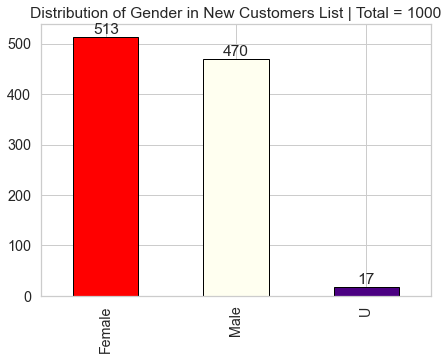

In [111]:
#NCL['gender'].value_counts().sort_index().plot.bar()

s = NCL['gender'].value_counts().sort_index()
import matplotlib._color_data as mcd
colours = list(mcd.CSS4_COLORS)

plt.figure()
fig = s.plot(kind='bar', color=random.sample(colours, len(s.index)), edgecolor='black')
fig.set_xticklabels(s.index)
fig.bar_label(fig.containers[0], label_type='edge')
plt.title('Distribution of Gender in New Customers List | Total = '+str(sum(s.values)))
plt.show()

In [65]:
sum(s.values)

1000

In [45]:
import random
random.sample(list(colours), 3)

[1, 1, 1]

In [145]:
# This prooves that all the full names are unique
# i.e there are 971 values in column full_name which has full_name repeated only 1 time's
NCL['full_name'].value_counts().value_counts()

1    971
Name: full_name, dtype: int64

In [155]:
# This should not be happening because we have 1000 rows but we are only getting 971 unique full names, lets check individual name columns
print('First Name: ', NCL['first_name'].value_counts().sum())
print('Last Name: ', NCL['last_name'].value_counts().sum())
# yes! last name has 971 columns only, so there are 1000-971=29 missing values in column last_name

First Name:  1000
Last Name:  971


In [159]:
#I think it will be better to check for null values beforehand so that we already know what to expect better
print('No of Empty cells for each column: ')
NCL.isna().sum()

No of Empty cells for each column: 


first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
full_name  

In [68]:
# checking out the datastypes of each variable
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     